# STAT 207 Project 03 - The Impact of Social Media Use on Students


Lahari Anantha, Livia Lin  and Kendall Gruenenfelder 

<hr>

### Contribution Report

Should we grade your submission?  If not, write the netID of the submission to be graded.  (Note: We will only grade one assignment per group, and we'll pick the first one that says we should grade that submission.  We will assign the same grade to all team members.)

*For example*, you might respond: **grade this submission** or **my submission is under netID jdeeke**

grade this submission

If you said **my submission is under netID** above, we will not grade any of your project submission.

If you said **grade this submission** above, who worked with you on this project?  Write both their **names** and **netIDs**.  

I worked with Livia Lin (llin55) and Kendall Gruenenfelder (krg6).

You should list the contribution of each team member to the report.

*For example:*

*John Smith (smith92) & Jane Doe (doe105) worked together on all parts of this project*

OR

<i>1. John Smith (smith92) completed parts 1 - 3</i>

<i>2. Jane Doe (doe105) completed parts 4 - 5</i>

<i>We both reviewed the full document before submission.</i>

Lahari Anantha(laharia2), Livia Lin (llin55) and Kendall Gruenenfelder (krg6) worked together on all parts of this project

Group Work Reflection

Reflecting on your experience working as a group, how do you think the project went?  What were the most effective things your group did to work together?  What were the least effective things your group did to work together?  What have you learned about group work from the last project?  What might you change about your group's process or dynamics for the next project?  Did you face any substantial challenges in working together?  If so, please explain any challenges that you had.

*Note*: this can be completed individually or as a group, and each person can submit their own reflection to their own repository/submission or completely within the group submission.  If you would like your TA to read your individual reflection and yours is not the submission to be graded, be sure to email your TA.

I think that the project went well and the most effective thing we did was clear communication and the least effective was not dividing work to do over thanksgiving break as that would have made the process simpler. Overall, we all worked well together and didn't face any substantial challenges.

## 1. Introduction

In [ ]:
#Imports here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error
import statsmodels.formula.api as smf
import statsmodels.api as sm


 Dataset introduction: The dataset “Student Social Media Addiction” anonymously examines students’ social media habits. This includes their most used platform or their average daily usage, and how this affects various areas of their lives, such as the hours of sleep they get or their mental health status. The study includes students ages 16-25 who are either enrolled in high school, undergraduate, or graduate programs. 


Research Questions: “What is the relationship between average daily usage and mental health score after controlling for age, hours of sleep per night and most used platform, both in the sample and in the underlying population? How does my model perform on new data?” and “Do students’ mental health score, sleep hours per night, and academic level relate to the log odds of whether students perceive their social media use as affecting their academic performance in the sample training data?”


Response Variables: The response variable for our first research question is mental health score, in which students their overall mental well-being on a scale from 1-10. The response variable for our second research question is Affects_Academic_Performance, which tells whether or not students perceive their use of social media to impact their academic performance. 


Contextual Importance: We would be interested in answering our first research question to determine if mental health is impacted by the amount of time that students spend on social media. Social media is extremely popular today, especially among students, and we wonder if spending too much time on social media is hurtful. The answer to this question can be used to possibly set daily time limits on social media and for people to be aware of the negative impacts that social media has on mental health. 
We would be interested in answering our second research question to determine the various factors that play a role in academic performance among students. We can see if mental health, amount of nightly sleep, and academic level influence students' perception of whether social media use affects academic performance. The answer to this question could be used to recommend an ideal range of sleep hours per night for students and educating on how this could impact academic performance. We can also educate people on taking care of their mental health to create a healthy relationship with social media use and hopefully improve academic performance. 


## 2. Linear Regression Analytical Tasks

Our research question is : What is the relationship between average daily usage and mental health score after controlling for age, hours of sleep per night and most used platform, both in the sample and in the underlying population? How does my model perform on new data? 


In [1]:
import pandas as pd
df = pd.read_csv("addiction.csv")
df

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4


In [2]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.2, random_state =101)

In [13]:
# Linear regression: mental health ~ avg daily usage + age + sleep + most used platform
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error

# Response and predictors
response = 'Mental_Health_Score'
predictors = ['Avg_Daily_Usage_Hours', 'Age', 'Sleep_Hours_Per_Night']
formula = 'Mental_Health_Score ~ Avg_Daily_Usage_Hours + Age + Sleep_Hours_Per_Night + C(Most_Used_Platform)'

# Fit OLS on training data
model = smf.ols(formula=formula, data=df_train).fit()

# Show coefficient values / summary output
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     Mental_Health_Score   R-squared:                       0.684
Model:                             OLS   Adj. R-squared:                  0.676
Method:                  Least Squares   F-statistic:                     84.94
Date:                 Wed, 03 Dec 2025   Prob (F-statistic):          2.68e-127
Time:                         17:34:21   Log-Likelihood:                -515.00
No. Observations:                  564   AIC:                             1060.
Df Residuals:                      549   BIC:                             1125.
Df Model:                           14                                         
Covariance Type:             nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

Linear Regression Model:

 $\hat{y}$ =8.0719−0.3583(Most_Used_Platform is Instagram)−0.5400(Most_Used_Platform is KakaoTalk)+0.4372(Most_Used_Platform is LINE)+0.1882(Most_Used_Platform is LinkedIn)−0.5692(Most_Used_Platform is Snapchat)−0.3967(Most_Used_Platform is TikTok)+0.2370(Most_Used_Platform is Twitter)+0.1166(Most_Used_Platform is Vkontakte)−0.0030(Most_Used_Platform is WeChat)+0.1577(Most_Used_Platform is WhatsApp) - 0.5488(Avg_Daily_Usage_Hours) - 0.0084(Age) + 0.1771(Sleep_Hours_Per_Night)

Relationship Between Our Selected Variables:

Our predictor variable of interest was average daily usage and it has a negative slope coefficient  of -0.5488 with mental health score, showing a negative relationship between average daily usage of social media and mental health score.

In [21]:
# Confidence Interval

sampling_dist= []
for i in range(10000):
    sample_df = df.sample(len(df), replace = True)
    model = smf.ols('Mental_Health_Score ~ Avg_Daily_Usage_Hours', data = sample_df).fit()
    sampling_dist.append(model.params['Avg_Daily_Usage_Hours'])
sampling_dist = pd.DataFrame({'slope': sampling_dist})

lower_quantile = sampling_dist['slope'].quantile(0.025)
upper_quantile = sampling_dist['slope'].quantile(0.975)

print ("The 95% Confidence Interval is (" + str(lower_quantile) + ", " + str(upper_quantile) + ")")

The 95% Confidence Interval is (-0.741903624590849, -0.6664186786141805)


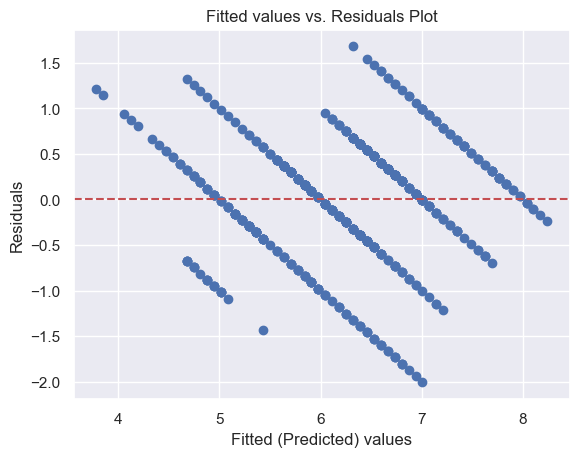

In [26]:
# Checking The Linear Regression Conditions: Fitted v Residuals Plot

X_train = df_train[predictors]
y_train = df_train["Mental_Health_Score"]
y_pred = model.predict(X_train[predictors])

residuals = y_train - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted (Predicted) values')
plt.ylabel('Residuals')
plt.title('Fitted values vs. Residuals Plot')
plt.show()

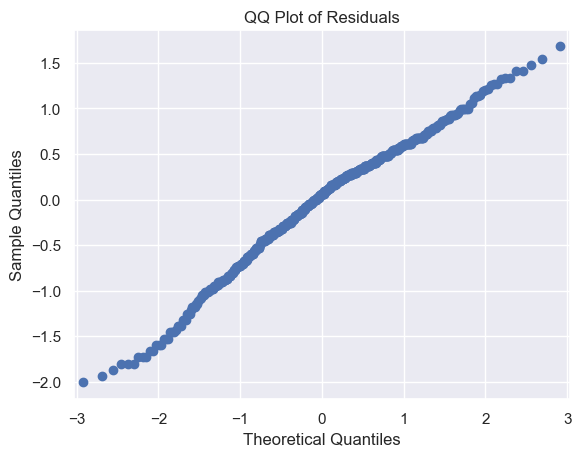

In [29]:
# Checking The Linear Regression Conditions: QQ Plot
sm.qqplot(residuals)
plt.title("QQ Plot of Residuals")
plt.show()

Our Fitted vs Residuals plot shows that the linearity assumption for Linear Regression is likely violated as there is a clear diagonal striping pattern in the graph instead of a random cloud of points. This means that we should be cautious when interpreting inference results. The QQ plot seems to be relatively normal so the normality assumption is met.

In [36]:
#Evaluating Model Performance

rsquared = model.rsquared
print("R^2: " + str(rsquared))


R^2: 0.6276678430767374


62.76% of the variablity in the response variable is explained by the model which is a bit low, but a moderate amount. This value was found from the R^2 value.

In [35]:

rmse = np.sqrt(mean_squared_error(df_test["Mental_Health_Score"], model.predict(df_test)))
print("RMSE: " + str(rmse))

RMSE: 0.6512127488095358


The RMSE is 0.65121 which seems low given that mental health score is on a scale of 1- 10.

## 3. Logistic Regression Analytical Tasks

Our Research Question:

Do students’ mental health score, sleep hours per night, and academic level relate to the log odds of whether students perceive their social media use as affecting their academic performance in the sample training data?

In [40]:
df_train_copy = df_train.copy()
df_train_copy['Affects_Academic_Performance'] = df_train_copy['Affects_Academic_Performance'].replace({'Yes': 1 , 'No': 0})
df_train_copy.head()

results2 = smf.logit("Affects_Academic_Performance ~ Mental_Health_Score + Sleep_Hours_Per_Night + Academic_Level", data = df_train_copy).fit()

results2.summary()


         Current function value: 0.120206
         Iterations: 35


C:\Users\Lahar\AppData\Local\Temp\ipykernel_10596\342220084.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train_copy['Affects_Academic_Performance'] = df_train_copy['Affects_Academic_Performance'].replace({'Yes': 1 , 'No': 0})
c:\Users\Lahar\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                Logit Regression Results                                
========================================================================================
Dep. Variable:     Affects_Academic_Performance   No. Observations:                  564
Model:                                    Logit   Df Residuals:                      559
Method:                                     MLE   Df Model:                            4
Date:                          Wed, 03 Dec 2025   Pseudo R-squ.:                  0.8129
Time:                                  18:32:16   Log-Likelihood:                -67.796
converged:                                False   LL-Null:                       -362.36
Covariance Type:                      nonrobust   LLR p-value:                3.492e-126
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                         161.6929   2.51e+04      0.006      0.995    -4.9e+04    4.93e+04
Academic_Level[T.High School]     -25.2000   8654.946     -0.003      0.998    -1.7e+04    1.69e+04
Academic_Level[T.Undergraduate]     0.0020      0.436      0.005      0.996      -0.852       0.856
Mental_Health_Score               -24.0600   3581.939     -0.007      0.995   -7044.531    6996.412
Sleep_Hours_Per_Night               0.6841      0.375      1.822      0.068      -0.052       1.420
===================================================================================================

Possibly complete quasi-separation: A fraction 0.74 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Which Charactersitics Lead to Success:
1. In terms of academic level, high school students who are in lower grades (e.g., freshman year) have higher log odds of believing social media affects their academic performance, while for undergraduate students, those in higher grade levels have higher log odds of thinking their academic performance is affected by their social media usage slightly more than newer undergraduates; graduate students thoughts do not shift based on year in school.

2. The lower a student’s mental health score is, the log odds of them believing that their social media usage impacts their academic performance increase.

3. The more a student sleeps per night, the log odds of them believing that social media impacts their academic performance increase.



In [41]:
df_train['predictive_prob'] = results2.predict(df_train)
from sklearn.metrics import roc_auc_score 
auc = roc_auc_score(y_true=df_train['Affects_Academic_Performance'], y_score=df_train['predictive_prob']) 
auc


0.9842674189628926

Pseudo R^2 and AUC Interpretation: 
The pseudo-R2 is 0.8129 and the AUC is 0.9843. With the pseudo-R2 at 0.8129, it is close to 1, and thus the model is strong. Additionally, since the AUC is also close to 1, we can assume that the model will have a predictive probability threshold that performs well.


In [42]:
#Building a Classifier
df_train['p-hat'] = results2.predict(df_train)
df_train.head()

df_train['yhat'] = 1 * (df_train['p-hat'] > 0.5)
df_train.head()

pd.crosstab(df_train['yhat'] , df['Affects_Academic_Performance'])


Affects_Academic_Performance,No,Yes
yhat,,
0,193,27
1,0,344


In [44]:
# Calculation accuracy, sensitivity and specificity

accuracy = (193 + 344) / (193+27+344+0)
print("accuracy:")
print(accuracy)


sensitivity = 344/(344+27)
print("sensitivity:")
print(sensitivity)


specificity = 193 / (193+0)
print("specificity:")
print(specificity)


accuracy:
0.9521276595744681
sensitivity:
0.9272237196765498
specificity:
1.0


Errors to Minimize: The type of error we would want to minimize is false negative, where a student does not believe that their academic performance is affected when it is. This can imply that a student is not taking the precautions to ensure their grades are in good standing.


Are We Satisfied?

We are satisfied with the current classifier since both the pseudo-R2 and the AUC are close to 1, giving us a strong model. Additionally, there are only 27 out of 564 students in our training dataset that are false negative, with an overall accuracy rate of 95.21%.


## Any other type of analysis/question you want to explore with this dataset.

<u>Why?</u>: Sometimes undergraduate students will put the research projects that they did for their classes on their resumes when applying for graduate schools, internships, and jobs. If you're interested in showcasing cool analyses to write on your resume, this section could help with that. **(This section is not worth any points though).**

We would want to explore how the relationship between mental health and social media use has changed in the last 20 years as social media use has increased greatly.

## 4. Conclusion

Summary:

Through our linear regression, we found a negative impact on increased daily average usage and mental health score as the correlation between the both was -0.5488. Although it is important to note that our fitted vs residual plot did show that the linearity assumption may have been violated so these finding may not be accurate.  With logistic regression, we fit a strong model with pseudo-R2 of 0.8129 and AUC of 0.9843 both close to 1. The model predicted log odds of students believing whether social media affects their academic performance based on their mental health score, sleep hours per night, and academic level. From this model, we found that lower mental health scores, higher hours of sleep each night, lower grade level high school students, and undergraduate upperclassmen have a higher log odds of believing social media is affecting their academic performance.


Limitations:

A limitation faced in this project is the lack of logical variables. We used the same dataset from the past two projects, which only had one logical variable to choose for the logistic regression. It is important to realize that we only have data from 705 students and that these variables are self-reported. Since the variables are self-reported, the students might have different interpretations of certain variables and rank things differently. While 705 students is a relatively large sample size, the person analyzing these results should be careful about making strong claims about all students aged 16-25 enrolled in high school, undergraduate, or graduate programs.


## AI Acknowledgement

Did you use AI on this assignment?  

If so, answer the following questions:
- Which AI did you use?
- What prompts did you ask it?
- How did you integrate the responses into your assignment?

We did not use AI on this assignment.